In [1]:
import sys
sys.path.insert(0, 'D:\Workspace\workspace_masterarbeit\PainLevelShiftDetection\Classes')

import warnings
warnings.filterwarnings('ignore')

from models import ClassificationModel, EmbeddingsModel
from trainer import SiameseTrainerCombinedLoss, all_subjects
import torch


import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [2]:
all_subjects = ['S001', 'S002', 'S003', 'S004', 'S005', 'S006', 'S007', 'S008',
                'S009', 'S010', 'S011', 'S012', 'S013', 'S014', 'S015', 'S016',
                'S017', 'S018', 'S019', 'S020', 'S021', 'S022', 'S023', 'S024',
                'S025', 'S026', 'S027', 'S029', 'S031', 'S032', 'S033', 'S034',
                'S035', 'S036', 'S037', 'S038', 'S039', 'S040', 'S041', 'S042',
                'S043', 'S044', 'S045', 'S046', 'S047', 'S048', 'S049', 'S050',
                'S051', 'S052', 'S053', 'S054', 'S055', 'S056', 'S057', 'S058',
                'S060', 'S061', 'S062', 'S063', 'S064', 'S065', 'S066', 'S067',
                'S068', 'S069', 'S070', 'S071', 'S072', 'S073', 'S074', 'S075',
                'S076', 'S077', 'S078', 'S079', 'S080', 'S081', 'S082', 'S083',
                'S084', 'S085', 'S086', 'S087', 'S088', 'S089', 'S090', 'S091',
                'S092', 'S093', 'S094', 'S095', 'S096', 'S097', 'S098', 'S099',
                'S100', 'S101', 'S102', 'S103', 'S104', 'S105', 'S106', 'S107',
                'S109', 'S110', 'S111', 'S112', 'S113', 'S114', 'S115', 'S116',
                'S117', 'S118', 'S119', 'S120', 'S121', 'S122', 'S123', 'S124',
                'S125', 'S126', 'S127', 'S128', 'S129', 'S130', 'S131', 'S132',
                'S133', 'S134']
subjects_test = [all_subjects[0]]
subjects_train = [sub for sub in all_subjects if sub not in subjects_test]

In [3]:
trainer_hyperparameter = {
    "path_train": "D:\Workspace\workspace_masterarbeit\PainLevelShiftDetection\FeatureGeneration\dataset_processed\XITE\\normalized_subjects.pkl",
    "subjects_train": subjects_train,
    "path_test": "D:\Workspace\workspace_masterarbeit\PainLevelShiftDetection\FeatureGeneration\dataset_processed\XITE\\normalized_subjects.pkl",
    "subjects_test": subjects_test,
    "learning_rate": 0.001,
    "batch_size": 64,
    "batch_size_test": 64,
    "margin": 0.04,
    "lambda_loss": 0.3,
    "filter": None,
    "weight_decay": 0.001,
    "number_steps": 2000
}

model_embedding_hyperparameter = {
        "sigmoid": True,
        "dropout": 0.3,
        "layers": [207, 512, 64]
}

model_classifier_hyperparameter = {
    "dropout": 0.4,
    "layers": [64, 32]
}

In [4]:
classifier_model = ClassificationModel(model_classifier_hyperparameter)
embedding_model = EmbeddingsModel(model_embedding_hyperparameter)

In [5]:
_ = embedding_model.load_state_dict(torch.load("D:\Workspace\workspace_masterarbeit\PainLevelShiftDetection\Results\models\embedding_models\model_abs_acc_89.40.pth"))

In [6]:
trainer = SiameseTrainerCombinedLoss(trainer_hyperparameter, classifier_model, embedding_model)

In [9]:
trainer.trainloop(5)

100%|██████████| 6/6 [00:05<00:00,  1.20it/s]


{'epoch': 1, 'train': {'loss': tensor(0.3874), 'acc': tensor(0.7391)}, 'test': {'loss': tensor(0.5854), 'acc': tensor(0.5187)}}


100%|██████████| 6/6 [00:03<00:00,  1.71it/s]


{'epoch': 2, 'train': {'loss': tensor(0.3436), 'acc': tensor(0.7930)}, 'test': {'loss': tensor(0.5356), 'acc': tensor(0.4965)}}


100%|██████████| 6/6 [00:02<00:00,  2.60it/s]


{'epoch': 3, 'train': {'loss': tensor(0.3248), 'acc': tensor(0.8107)}, 'test': {'loss': tensor(0.4991), 'acc': tensor(0.5503)}}


100%|██████████| 6/6 [00:02<00:00,  2.58it/s]


{'epoch': 4, 'train': {'loss': tensor(0.3113), 'acc': tensor(0.8253)}, 'test': {'loss': tensor(0.5390), 'acc': tensor(0.5239)}}


100%|██████████| 6/6 [00:02<00:00,  2.80it/s]

{'epoch': 5, 'train': {'loss': tensor(0.3081), 'acc': tensor(0.8272)}, 'test': {'loss': tensor(0.5615), 'acc': tensor(0.5187)}}


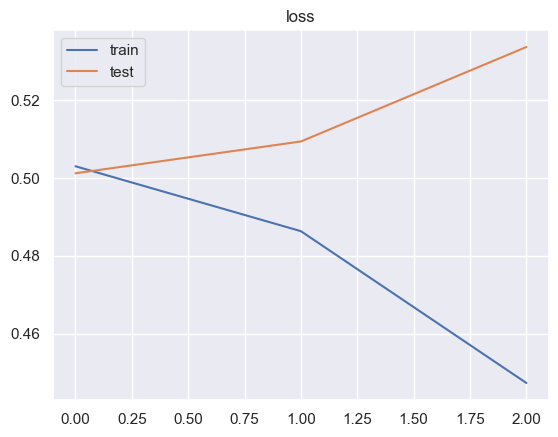

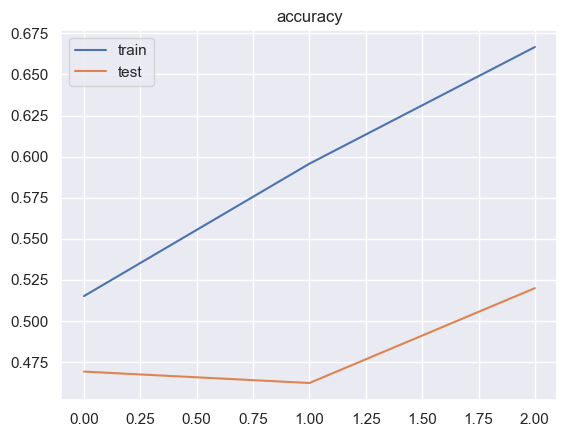

In [8]:
trainer.plot_history()